In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete.csv')
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [7]:
X = df.iloc[:, :8]
y = df.iloc[:, -1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.6275531792314848

In [25]:
cross_val_result = cross_val_score(lr, X, y, scoring='r2', cv=10)

In [26]:
cross_val_result.mean()

0.27820729160873753

In [27]:
import matplotlib.pyplot as plt

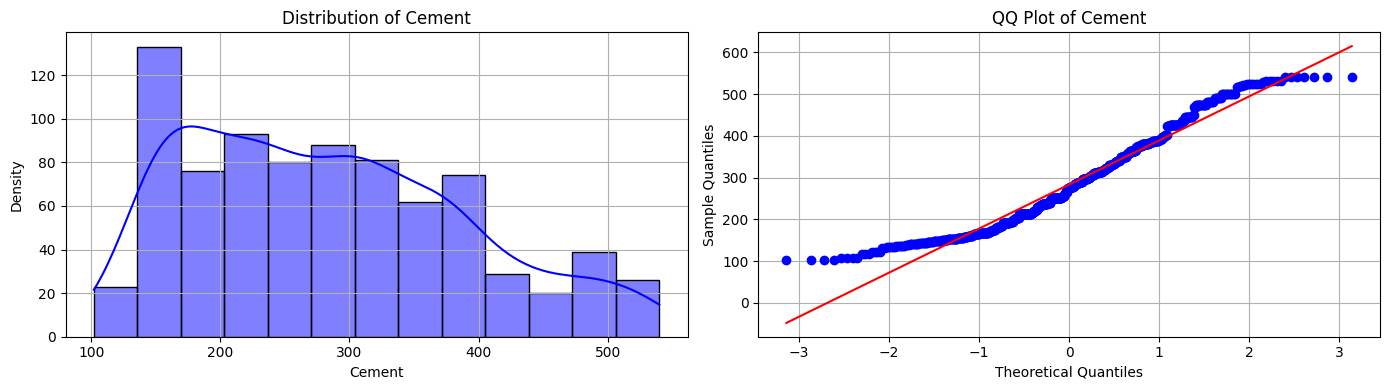

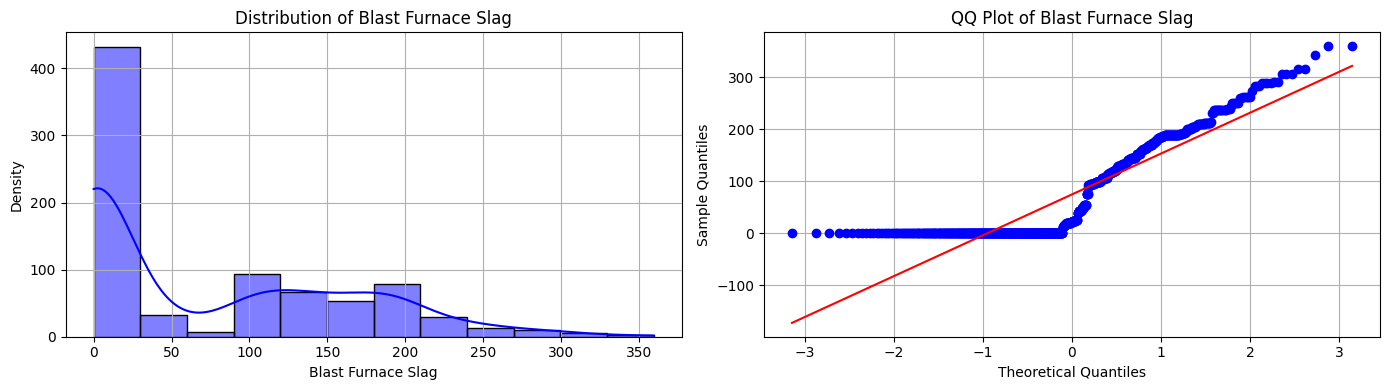

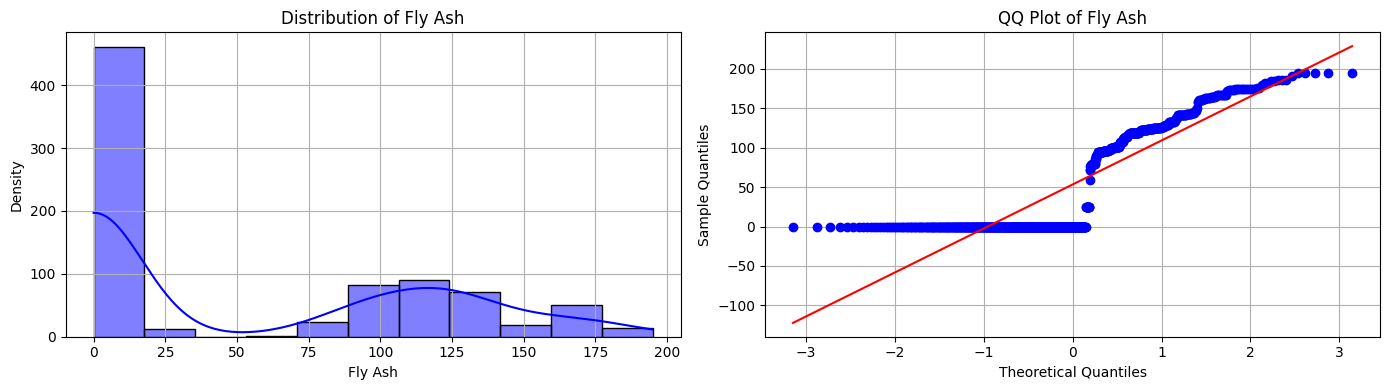

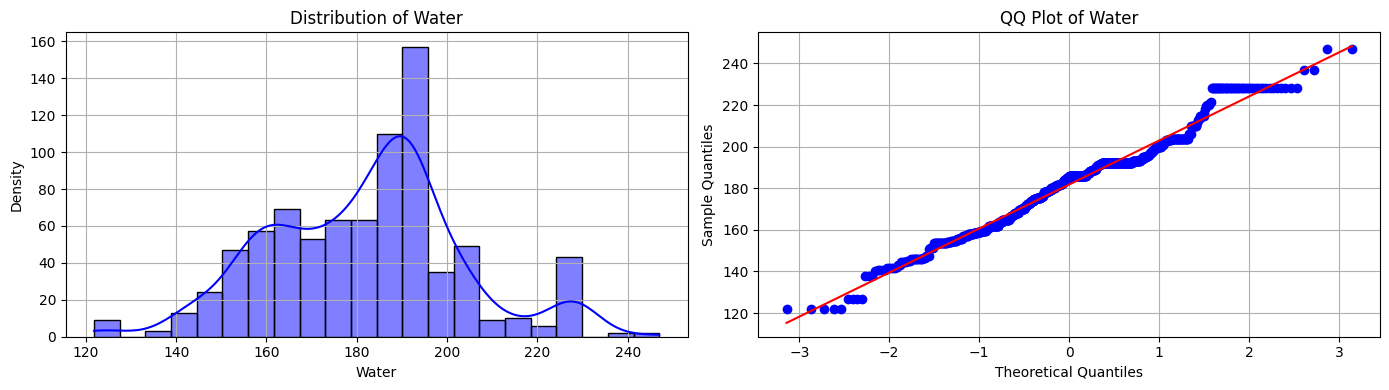

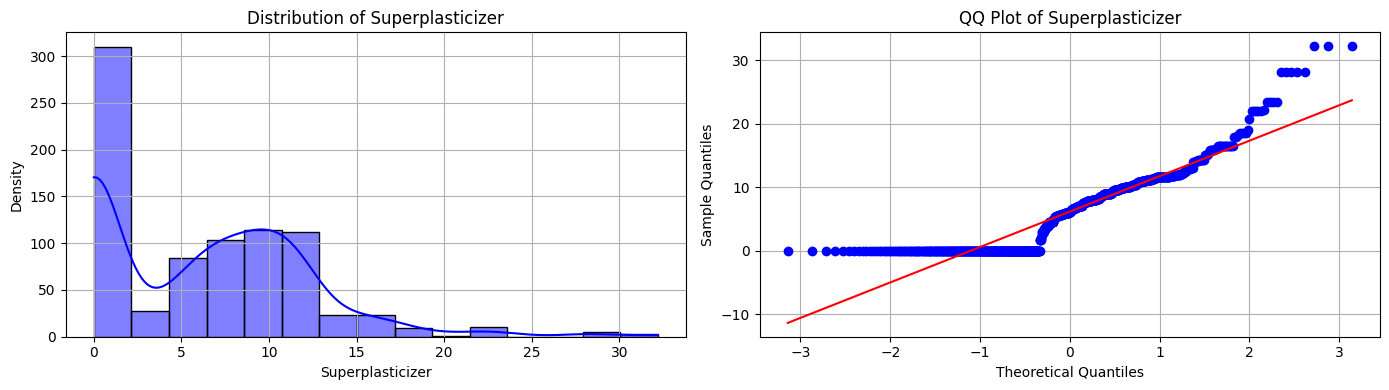

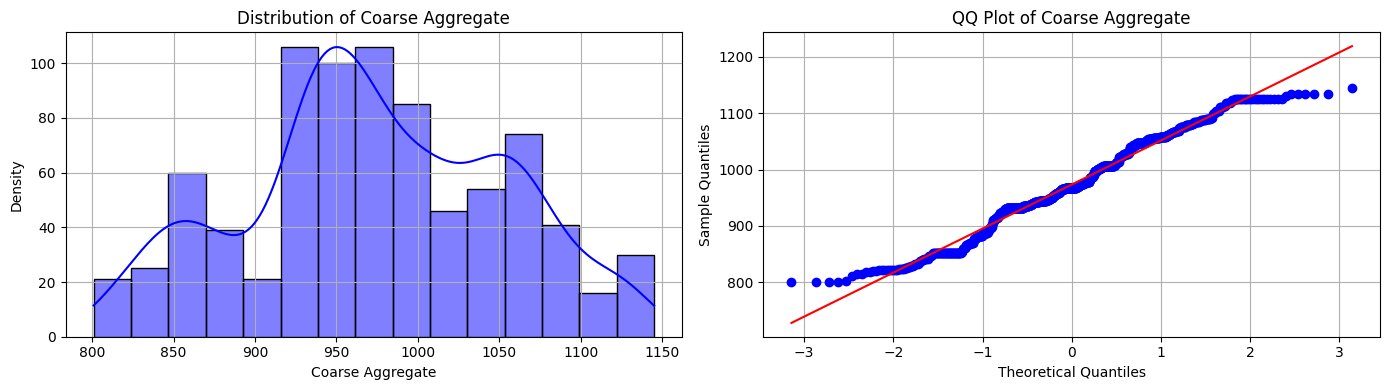

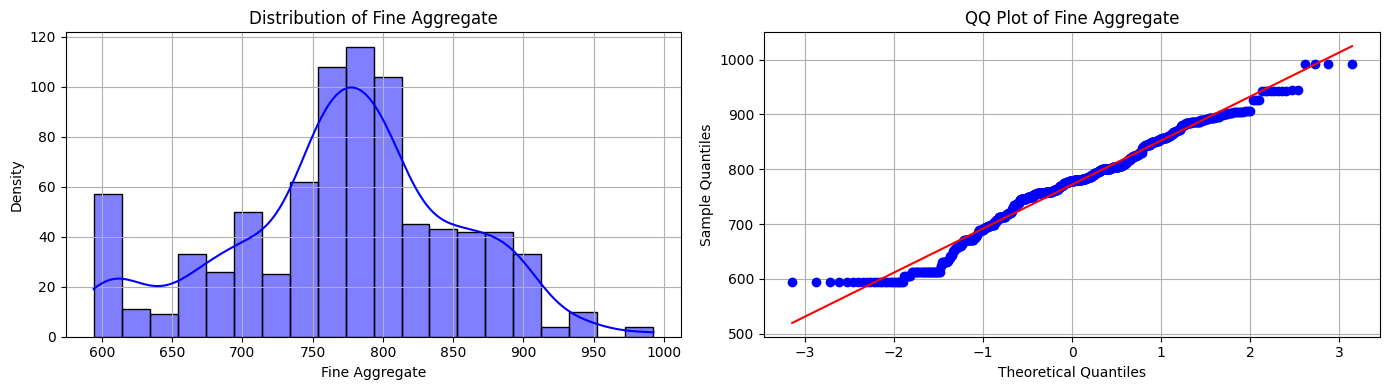

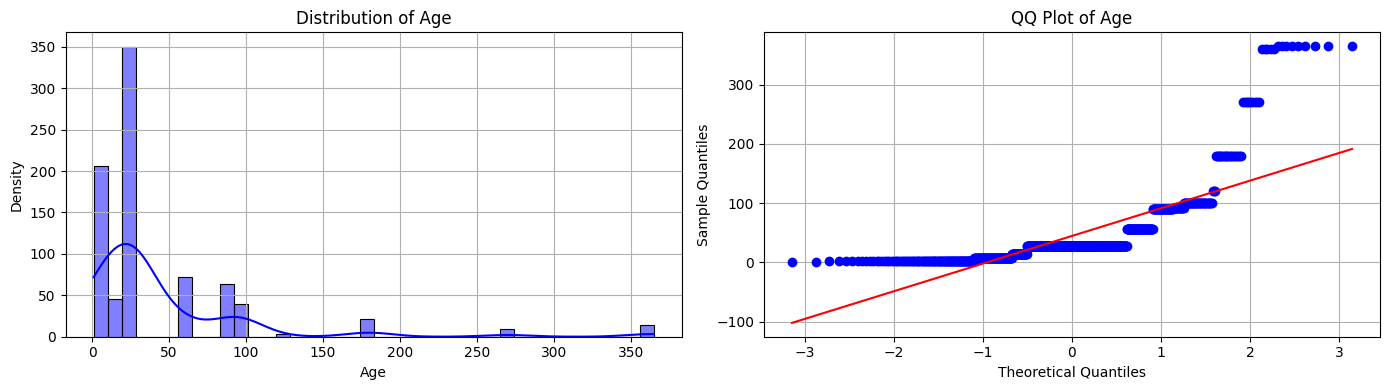

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loop through each column in the dataset
for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create two side-by-side subplots

    # Distribution plot
    sns.histplot(X_train[col], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")
    axes[0].grid(True)

    # QQ plot
    stats.probplot(X_train[col], dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ Plot of {col}")
    axes[1].set_xlabel("Theoretical Quantiles")
    axes[1].set_ylabel("Sample Quantiles")
    axes[1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [30]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [31]:
X_train_transformed

array([[-1.27975148,  0.9561511 ,  1.12804495, ..., -0.26250008,
        -0.67756847,  0.1060097 ],
       [ 1.24470596,  0.70199413,  1.13757676, ..., -1.91272791,
        -0.31406219,  0.1060097 ],
       [ 0.07984236, -1.08566729,  1.13140696, ...,  1.01840672,
         0.02595744, -1.67597002],
       ...,
       [-0.84451727, -1.08566729,  1.13368097, ...,  1.34536665,
         0.29715694,  1.24673336],
       [ 1.5656235 ,  0.92549636, -0.88721185, ..., -1.5372548 ,
         0.0762111 ,  0.1060097 ],
       [ 0.42655631, -1.08566729,  1.12610617, ..., -0.62083414,
         0.0951082 ,  0.1060097 ]])

In [32]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)
r2_score(y_test, y_pred)


0.8047825011695536

In [33]:
pt = PowerTransformer(method='box-cox')

X_transformed = pt.fit_transform(X+0.000001)


In [34]:
# using cross val score

np.mean(cross_val_score(lr, X_transformed, y, scoring='r2', cv=10))

0.6466764749006961

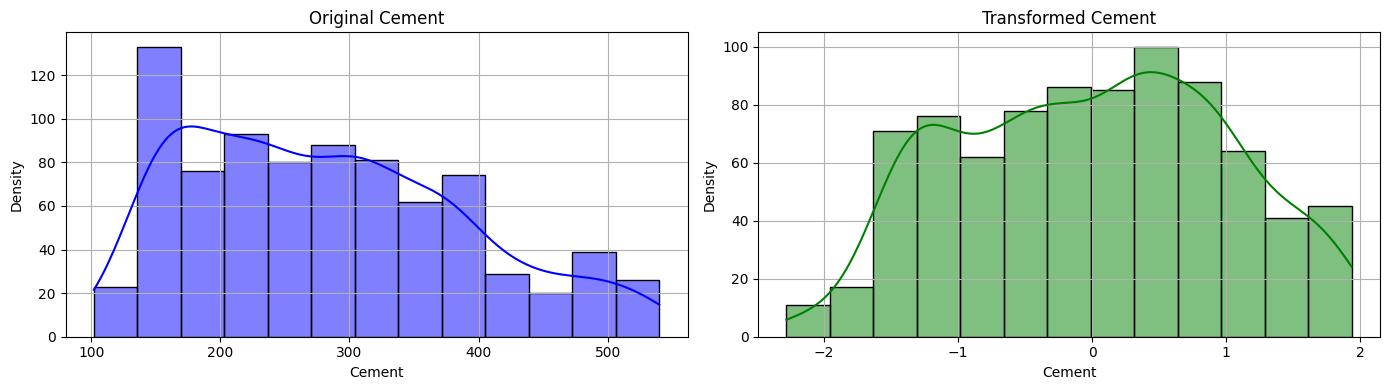

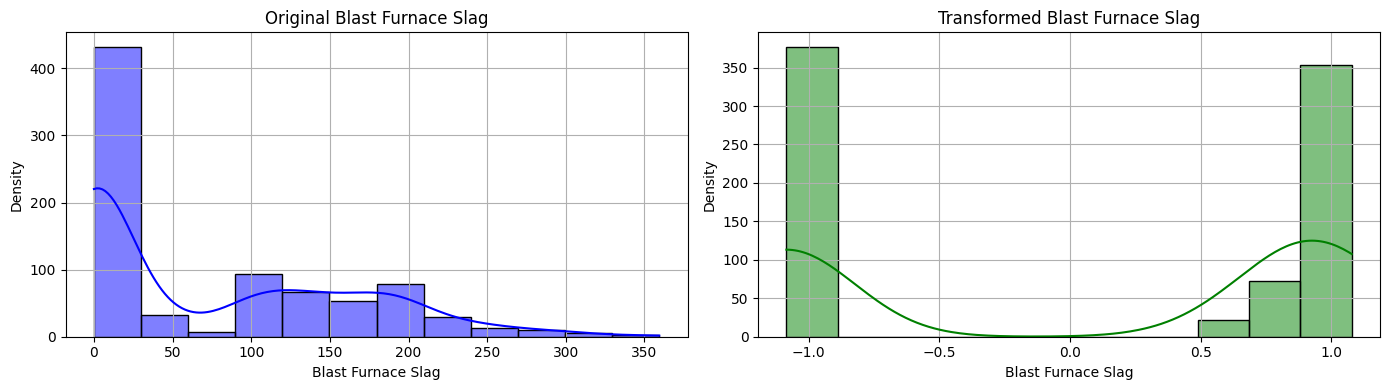

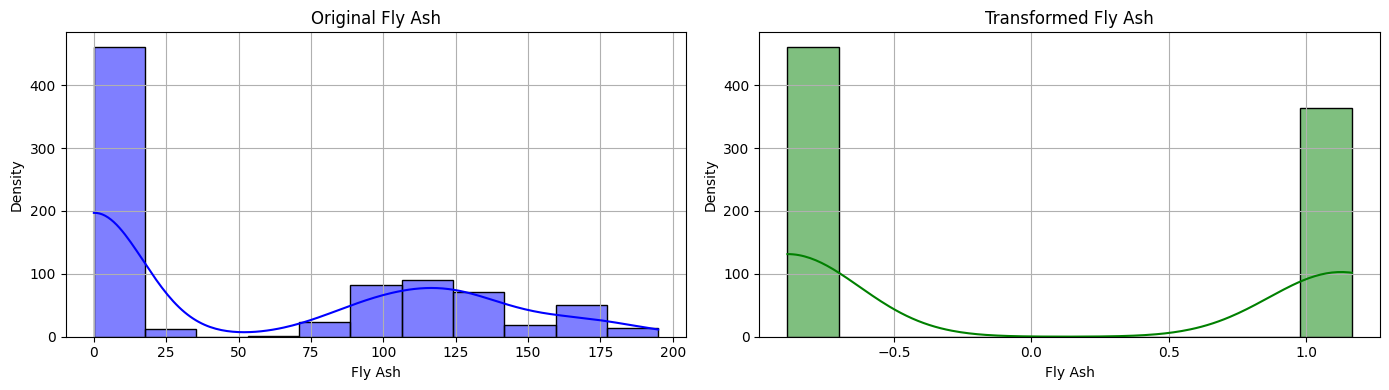

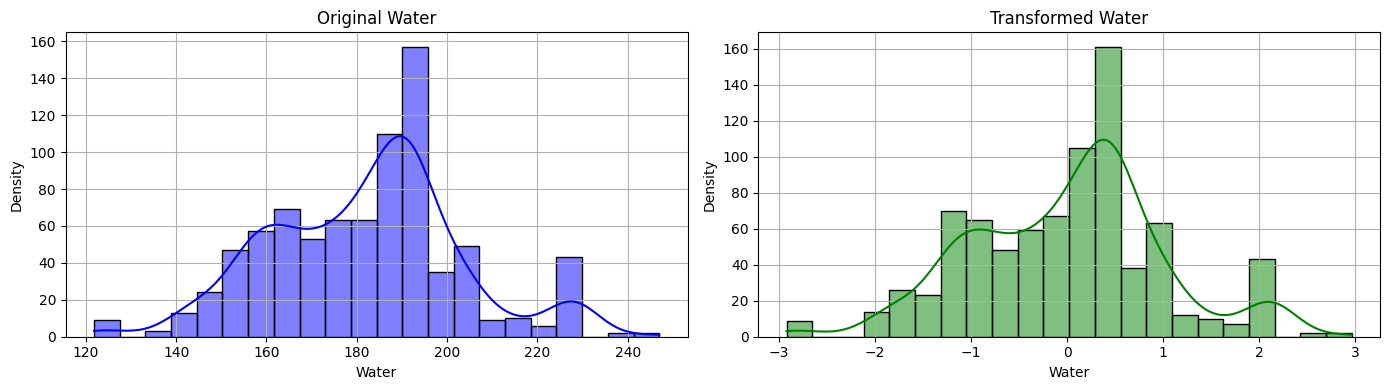

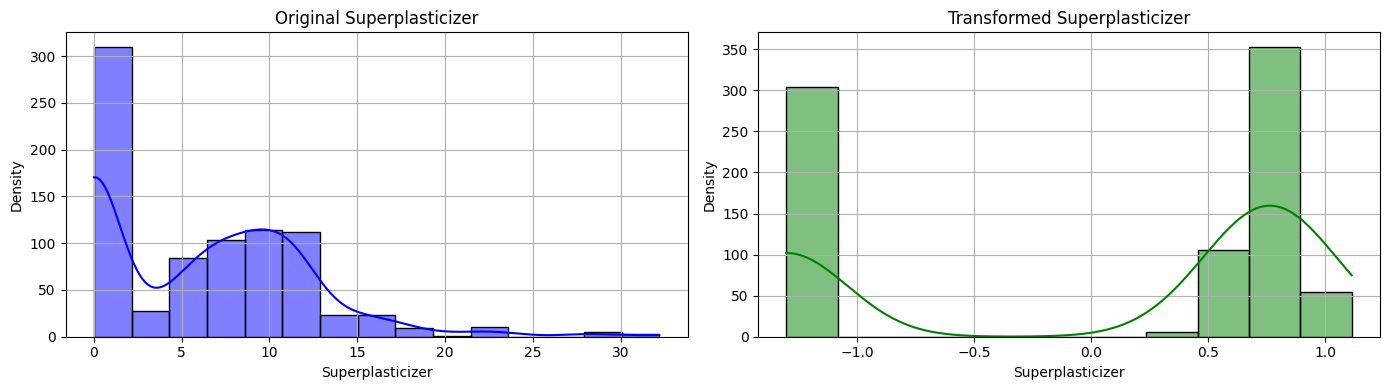

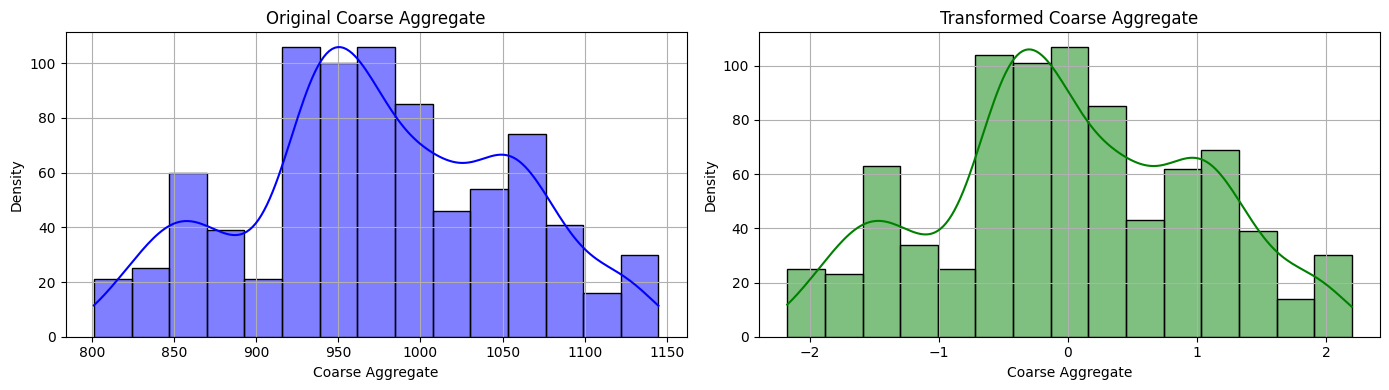

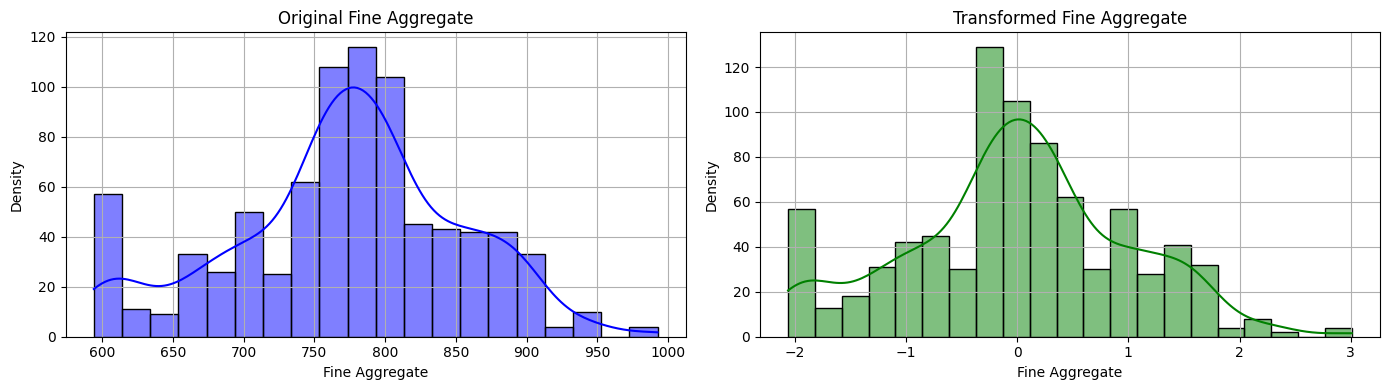

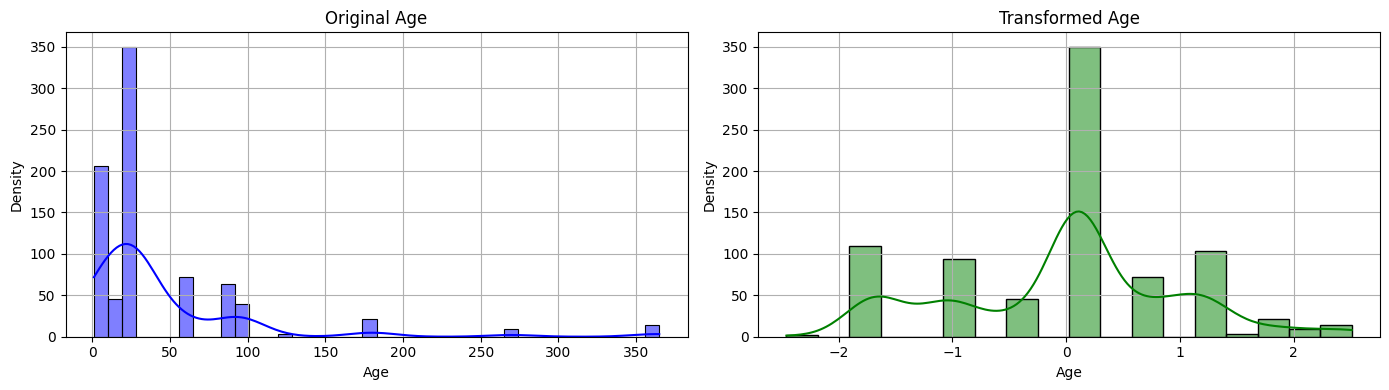

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the transformed data if not already present
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Loop through each column to compare distributions before and after transformation
for col in X_train_transformed.columns:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Plot the original data distribution
    sns.histplot(X_train[col], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"Original {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")
    axes[0].grid(True)

    # Plot the transformed data distribution
    sns.histplot(X_train_transformed[col], kde=True, ax=axes[1], color='green')
    axes[1].set_title(f"Transformed {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Density")
    axes[1].grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


In [37]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354853


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [38]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500864

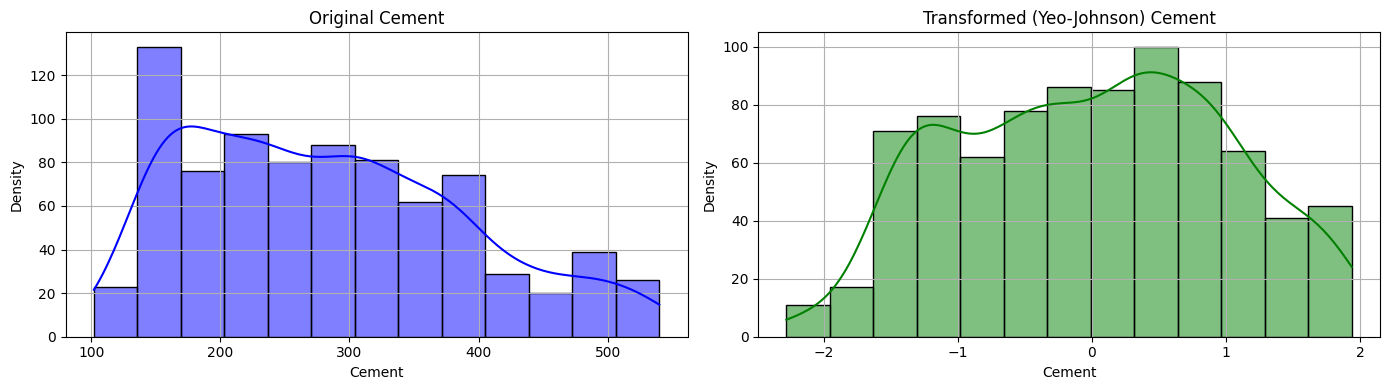

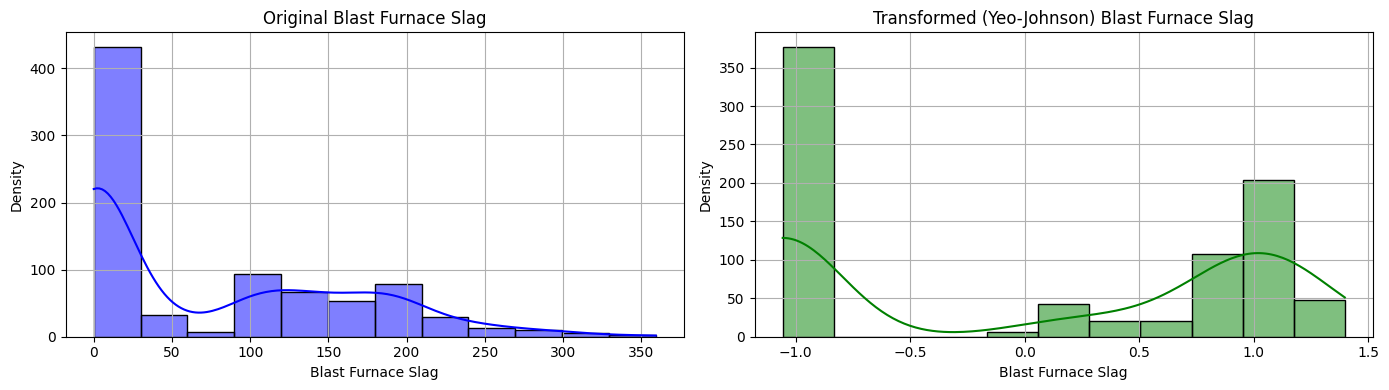

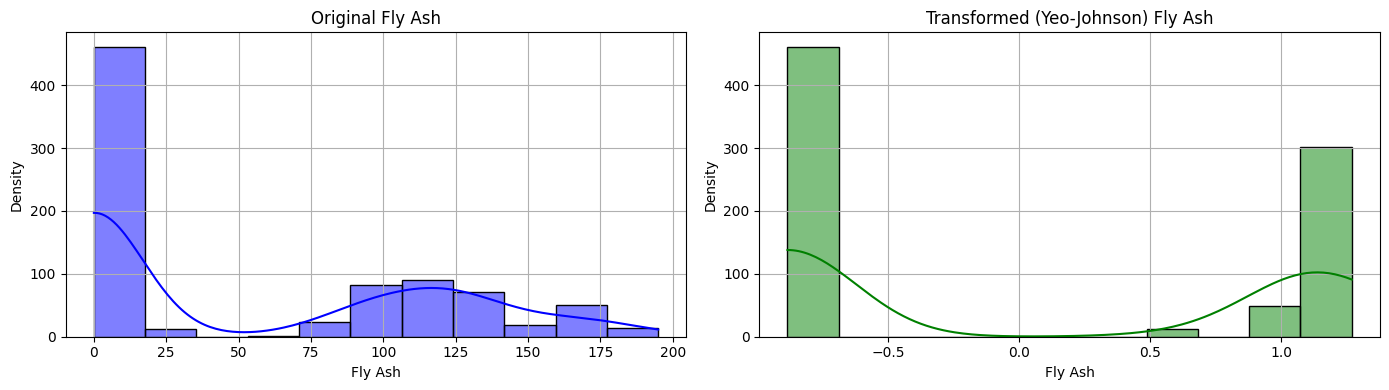

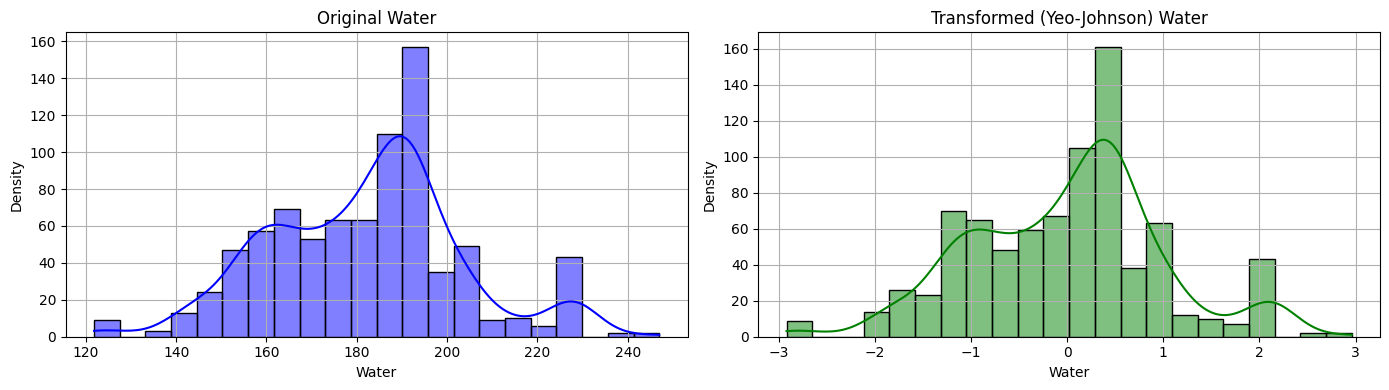

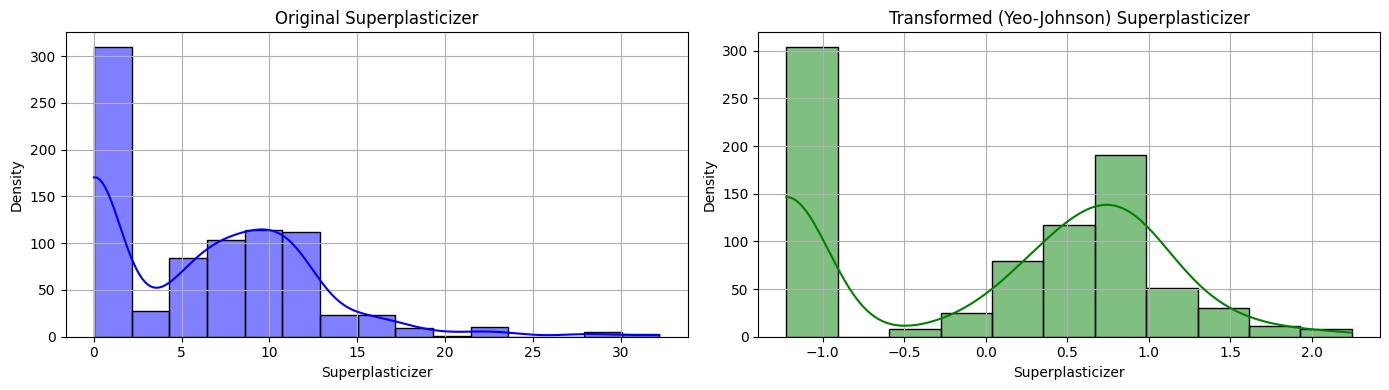

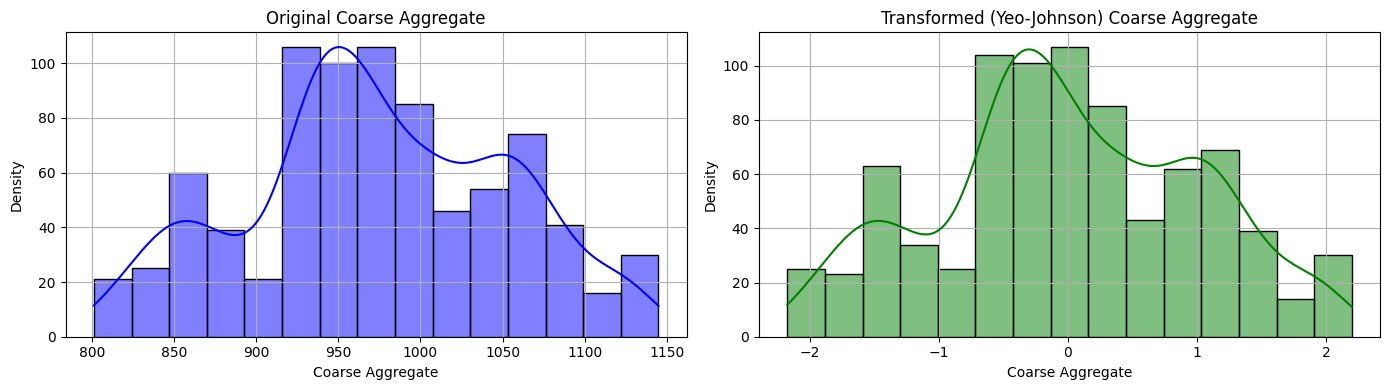

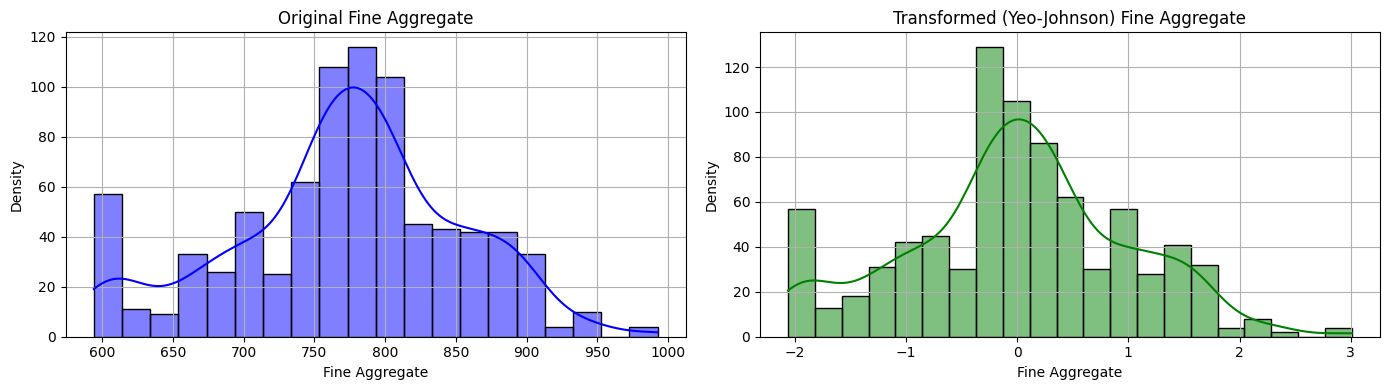

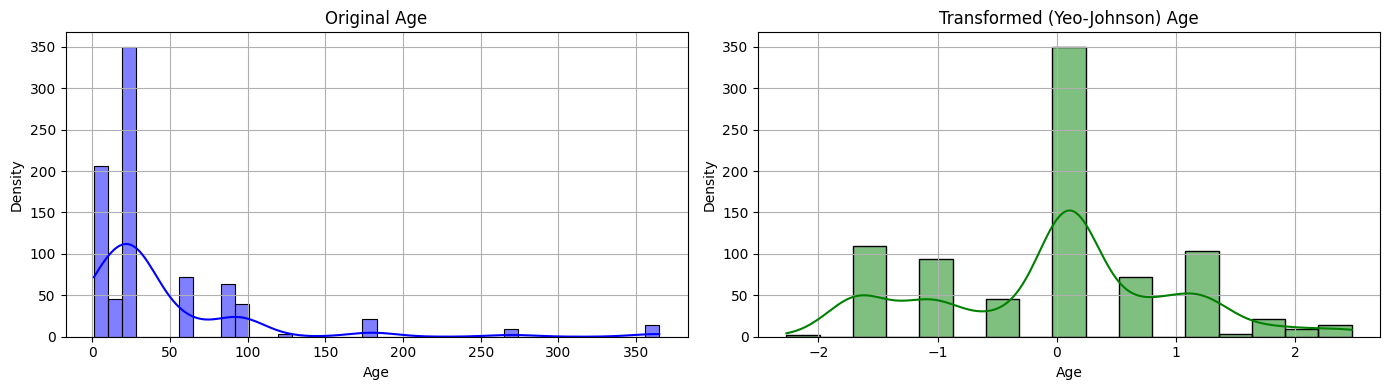

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train and X_train_transformed2 have the same columns
columns = X_train.columns if isinstance(X_train, pd.DataFrame) else range(X_train.shape[1])

# Loop through each column by index
for idx, col in enumerate(columns):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # Plot the original data distribution
    sns.histplot(X_train[:, idx] if isinstance(X_train, np.ndarray) else X_train[col], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"Original {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")
    axes[0].grid(True)
    
    # Plot the transformed data distribution
    sns.histplot(X_train_transformed2[:, idx], kde=True, ax=axes[1], color='green')
    axes[1].set_title(f"Transformed (Yeo-Johnson) {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Density")
    axes[1].grid(True)
    
    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()
